# The Normal Distribution and Confidence Intervals

We would like to setup an experiment where we generate different columns of random numbers to simulate fair dice rolls, as well as other columns representing other quantities, to get a better understanding of the normal distribution and confidence intervals.

In [44]:
#@title Imports
#@markdown Let's import our libraries we will use for this notebook. You may recognize these libraries from the previous notebook!
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from IPython.display import display, HTML

## Generating Dice

We would like to simulate the experiment of rolling a fair six-sided die 100 times. This can be done by randomly generating 100 integers between 1 and 6 inclusive.

In [45]:
data = pd.DataFrame()

data['Die 1'] = np.random.randint(1, 7, 100)
data

,Die 1
0,3
1,5
2,2
3,4
4,1
...,...
95,5
96,1
97,6
98,2


As you can see above, we create an empty `DataFrame` and create a column `'Dice 1'`. We then use NumPy to randomly generate 100 integers between 1 (inclusive) and 7 (exclusive; the greatest possible number is 6). Rest assured, even though only ~10 rows are visible for readability purposes, all 100 rolls were indeed generated.

We will repeat this process for the three other dies we need.

In [46]:
data['Die 2'] = np.random.randint(1, 7, 100)
data['Die 3'] = np.random.randint(1, 7, 100)
data['Die 4'] = np.random.randint(1, 7, 100)
data

,Die 1,Die 2,Die 3,Die 4
0,3,4,3,1
1,5,1,1,1
2,2,4,5,1
3,4,6,4,3
4,1,2,6,3
...,...,...,...,...
95,5,4,6,5
96,1,2,2,5
97,6,5,4,1
98,2,4,2,4


Now that we have our 4 simulated dice rolls, we can create new columns that represent the sums of the dice rolls. For example, we can create a column `'2 Dice'` and add two of the first four columns together.

In [47]:
data['2 Dice'] = data['Die 1'] + data['Die 2']
data[['Die 1', 'Die 2', '2 Dice']]

,Die 1,Die 2,2 Dice
0,3,4,7
1,5,1,6
2,2,4,6
3,4,6,10
4,1,2,3
...,...,...,...
95,5,4,9
96,1,2,3
97,6,5,11
98,2,4,6


As you can see, for each row in the resultant `'2 Dice'` column, the value is indeed obtained by adding the row values from `'Die 1'` and `'Die 2'`.

We can repeat this process to create columns for `'3 Dice'` (sum of three dice rolls) and `'4 Dice'` (sum of all four dice rolls).

In [48]:
data['3 Dice'] = data['Die 1'] + data['Die 2'] + data['Die 3']
data['4 Dice'] = data['Die 1'] + data['Die 2'] + data['Die 3'] + data['Die 4']
data

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice
0,3,4,3,1,7,10,11
1,5,1,1,1,6,7,8
2,2,4,5,1,6,11,12
3,4,6,4,3,10,14,17
4,1,2,6,3,3,9,12
...,...,...,...,...,...,...,...
95,5,4,6,5,9,15,20
96,1,2,2,5,3,5,10
97,6,5,4,1,11,15,16
98,2,4,2,4,6,8,12


Finally, we will create a few "funny" dice. That is to say, we will simulate rolling dice that have face values different from the traditional 1-6.

Simply, we can perform the same steps when generating our first four dice, but change the boundaries when we randomly generate our 100 rolls.

In [49]:
data['Funny 1'] = np.random.randint(2, 8, 100)
data['Funny 2'] = np.random.randint(3, 9, 100)
data['Funny 3'] = np.random.randint(4, 10, 100)
data['Funny 4'] = np.random.randint(5, 11, 100)
data

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
0,3,4,3,1,7,10,11,4,7,4,8
1,5,1,1,1,6,7,8,3,5,5,5
2,2,4,5,1,6,11,12,6,4,8,7
3,4,6,4,3,10,14,17,2,6,8,7
4,1,2,6,3,3,9,12,4,4,6,9
...,...,...,...,...,...,...,...,...,...,...,...
95,5,4,6,5,9,15,20,3,8,6,5
96,1,2,2,5,3,5,10,6,8,5,7
97,6,5,4,1,11,15,16,2,3,9,10
98,2,4,2,4,6,8,12,7,6,8,8


## Plotting and Statistics

Now, for each column in our `DataFrame`, we can plot a histogram with the values on the x-axis and the frequencies on the y-axis.

We will break this up into three sets of subplots for readability.

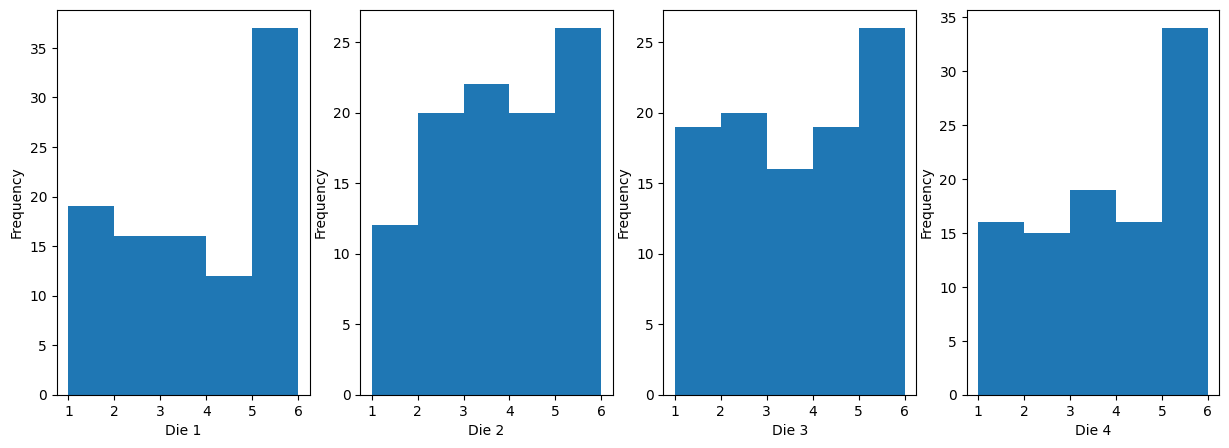

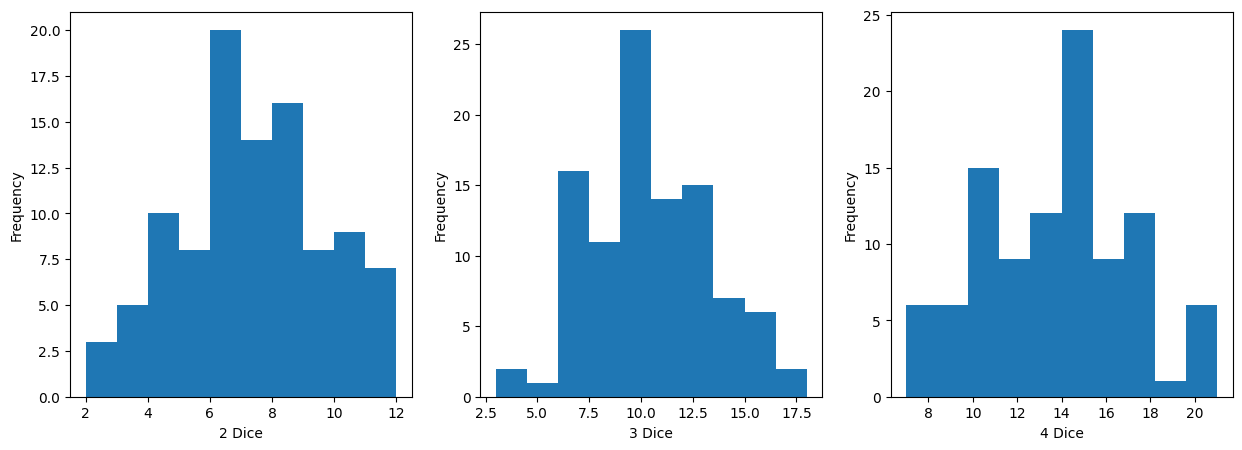

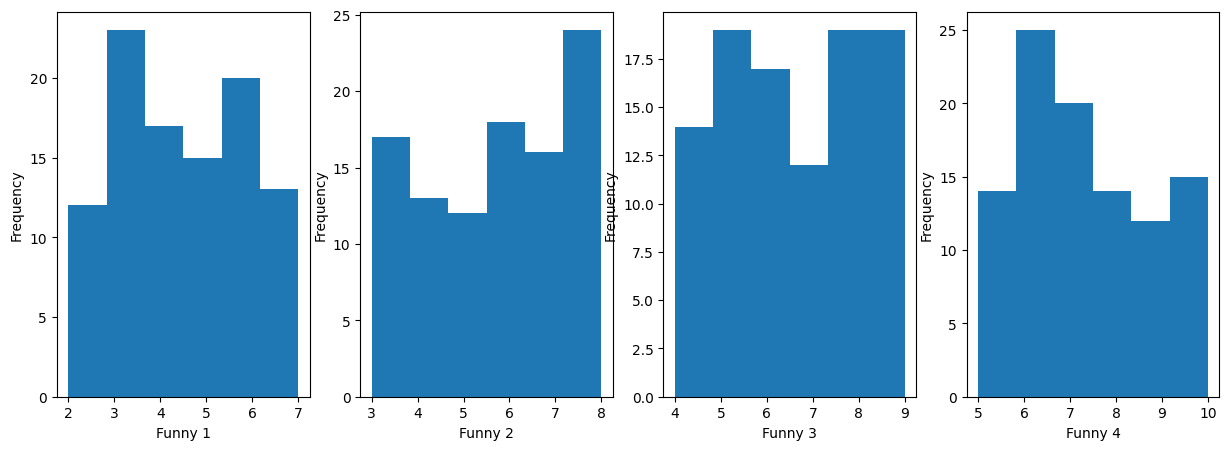

In [50]:
#@title Histograms

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[:4]):
    data[col].plot.hist(ax=axs[i], bins=range(1,7))
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns[4:7]):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(data.columns[7:]):
    data[col].plot.hist(ax=axs[i], bins=6)
    axs[i].set_xlabel(col)

plt.show()

We can also plot boxplots for each column.

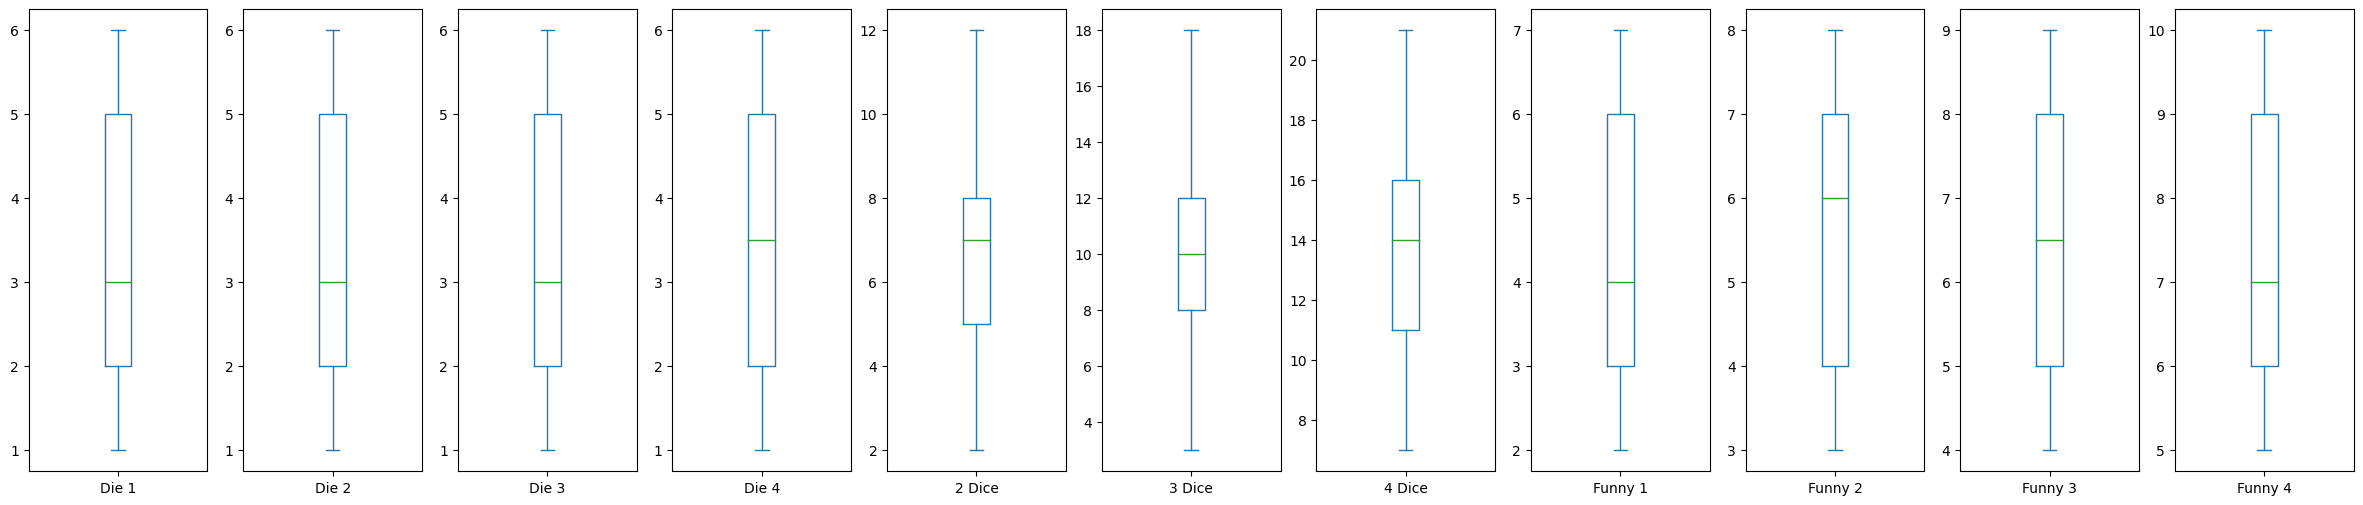

In [51]:
#@title Boxplots

fig, axs = plt.subplots(1, len(data.columns), figsize=(30, 6))
for i, col in enumerate(data.columns):
    data[col].plot.box(ax=axs[i])

plt.show()

Next, we will calculate the following statistics to get a better understanding of these distributions:
* Mean
* Median
* Standard Deviation
* Standard Error of the Mean
* 95% Confidence Interval

In [52]:
#@title Statistics

crit_t = stats.t.ppf(1-0.025,df=(len(data)-1))

stat_df = pd.DataFrame()
stat_df['Mean'] = data.mean()
stat_df['Median'] = data.median()
stat_df['Std. Dev.'] = data.std()
stat_df['Std. Err.'] = data.sem()
stat_df['Lower 95%'] = data.mean() - crit_t * data.sem()
stat_df['Upper 95%'] = data.mean() + crit_t * data.sem()
stat_df = stat_df.T
stat_df

,Die 1,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.490000,3.390000,3.290000,3.520000,6.880000,10.170000,13.690000,4.470000,5.750000,6.600000,7.300000
Median,3.000000,3.000000,3.000000,3.500000,7.000000,10.000000,14.000000,4.000000,6.000000,6.500000,7.000000
Std. Dev.,1.778065,1.530135,1.713258,1.678624,2.366773,2.954384,3.286627,1.623408,1.805575,1.734964,1.648385
Std. Err.,0.177807,0.153014,0.171326,0.167862,0.236677,0.295438,0.328663,0.162341,0.180557,0.173496,0.164838
Lower 95%,3.137193,3.086388,2.950052,3.186925,6.410381,9.583786,13.037862,4.147881,5.391735,6.255745,6.972925
Upper 95%,3.842807,3.693612,3.629948,3.853075,7.349619,10.756214,14.342138,4.792119,6.108265,6.944255,7.627075


## Distributions by Die 1

Now, we will want to select random samples from each of the columns we have created in our DataFrame. How can we do this?

Since our first column consists of randomly generated numbers, if we select all the corresponding rows of, say, `'Die 2'` where the value of `'Die 1'` equals 1, it is equivalent to drawing a random sample of `'Die 2'`.

In [53]:
samples = []
for face in data['Die 1'].unique():
  samples.append(data[data['Die 1'] == face].drop('Die 1', axis=1))

Let's go ahead and calculate the same statistics for each sample.

In [54]:
#@title Statistics for Samples

for i,sample in enumerate(samples):
  crit_t = stats.t.ppf(1-0.025,df=(len(sample)-1))
  sample_df = pd.DataFrame()
  sample_df['Mean'] = sample.mean()
  sample_df['Median'] = sample.median()
  sample_df['Std. Dev.'] = sample.std()
  sample_df['N'] = sample.shape[0]
  sample_df['Std. Err.'] = sample.sem()
  sample_df['Lower 95%'] = sample.mean() - crit_t * sample.sem()
  sample_df['Upper 95%'] = sample.mean() + crit_t * sample.sem()
  sample_df = sample_df.T
  display(HTML(f"<h3>Sample {i+1} (Die 1 = {i+1})</h3>"))
  display(sample_df)

,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.812500,3.375000,3.625000,6.812500,10.187500,13.812500,4.375000,5.750000,6.312500,7.437500
Median,4.000000,3.000000,4.000000,7.000000,10.000000,14.500000,4.500000,6.000000,6.000000,7.000000
Std. Dev.,1.376893,1.668333,1.857418,1.376893,1.905037,3.166886,1.360147,1.732051,1.990603,1.459166
N,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
Std. Err.,0.344223,0.417083,0.464354,0.344223,0.476259,0.791721,0.340037,0.433013,0.497651,0.364792
Lower 95%,3.078806,2.486008,2.635252,6.078806,9.172377,12.124986,3.650229,4.827055,5.251783,6.659965
Upper 95%,4.546194,4.263992,4.614748,7.546194,11.202623,15.500014,5.099771,6.672945,7.373217,8.215035


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.050000,3.550000,3.300000,8.050000,11.600000,14.900000,4.600000,5.750000,6.600000,6.850000
Median,3.000000,4.000000,3.000000,8.000000,11.500000,15.000000,4.500000,5.500000,6.000000,6.000000
Std. Dev.,1.731291,1.791060,1.780006,1.731291,2.303316,3.275105,1.535544,1.773341,1.635140,1.663066
N,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
Std. Err.,0.387128,0.400493,0.398021,0.387128,0.515037,0.732336,0.343358,0.396531,0.365629,0.371873
Lower 95%,2.239731,2.711758,2.466932,7.239731,10.522015,13.367203,3.881343,4.920051,5.834731,6.071661
Upper 95%,3.860269,4.388242,4.133068,8.860269,12.677985,16.432797,5.318657,6.579949,7.365269,7.628339


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.562500,3.562500,3.875000,5.562500,9.125000,13.000000,5.187500,5.125000,6.937500,7.625000
Median,3.500000,3.500000,5.000000,5.500000,8.500000,12.500000,6.000000,4.000000,7.500000,7.500000
Std. Dev.,1.152895,1.787689,1.892969,1.152895,2.362908,3.033150,1.470544,1.962142,1.652019,1.586401
N,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
Std. Err.,0.288224,0.446922,0.473242,0.288224,0.590727,0.758288,0.367636,0.490535,0.413005,0.396600
Lower 95%,2.948166,2.609908,2.866308,4.948166,7.865895,11.383748,4.403902,4.079448,6.057201,6.779667
Upper 95%,4.176834,4.515092,4.883692,6.176834,10.384105,14.616252,5.971098,6.170552,7.817799,8.470333


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,4.333333,2.166667,3.666667,8.333333,10.500000,14.166667,3.500000,6.583333,6.500000,7.166667
Median,4.000000,2.000000,3.500000,8.000000,10.000000,14.500000,3.000000,7.000000,6.500000,7.000000
Std. Dev.,1.497473,1.114641,1.497473,1.497473,1.783765,1.946247,1.507557,1.676486,1.507557,1.642245
N,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Std. Err.,0.432283,0.321769,0.432283,0.432283,0.514929,0.561833,0.435194,0.483960,0.435194,0.474075
Lower 95%,3.381885,1.458458,2.715218,7.381885,9.366650,12.930080,2.542144,5.518145,5.542144,6.123234
Upper 95%,5.284782,2.874876,4.618115,9.284782,11.633350,15.403253,4.457856,7.648522,7.457856,8.210100


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,2.842105,3.263158,3.789474,3.842105,7.105263,10.894737,4.526316,5.842105,6.578947,7.684211
Median,3.000000,3.000000,4.000000,4.000000,7.000000,11.000000,4.000000,6.000000,6.000000,8.000000
Std. Dev.,1.302270,1.758854,1.718492,1.302270,2.401267,2.726307,1.836918,1.772104,1.643701,1.701393
N,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
Std. Err.,0.298761,0.403509,0.394249,0.298761,0.550888,0.625458,0.421418,0.406548,0.377091,0.390326
Lower 95%,2.214431,2.415417,2.961187,3.214431,5.947890,9.580699,3.640949,4.987979,5.786709,6.864166
Upper 95%,3.469779,4.110898,4.617761,4.469779,8.262637,12.208775,5.411682,6.696232,7.371186,8.504256


,Die 2,Die 3,Die 4,2 Dice,3 Dice,4 Dice,Funny 1,Funny 2,Funny 3,Funny 4
Mean,3.176471,3.470588,2.941176,9.176471,12.647059,15.588235,4.352941,5.647059,6.647059,7.058824
Median,3.000000,3.000000,3.000000,9.000000,14.000000,16.000000,4.000000,6.000000,6.000000,7.000000
Std. Dev.,1.740521,1.806850,1.248529,1.740521,2.998774,3.083400,1.765686,1.902011,2.089892,1.853058
N,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
Std. Err.,0.422138,0.438225,0.302813,0.422138,0.727310,0.747834,0.428242,0.461306,0.506873,0.449433
Lower 95%,2.281578,2.541592,2.299242,8.281578,11.105231,14.002898,3.445109,4.669135,5.572536,6.106069
Upper 95%,4.071364,4.399585,3.583111,10.071364,14.188886,17.173573,5.260773,6.624983,7.721582,8.011578


And now let's plot the histogarms.

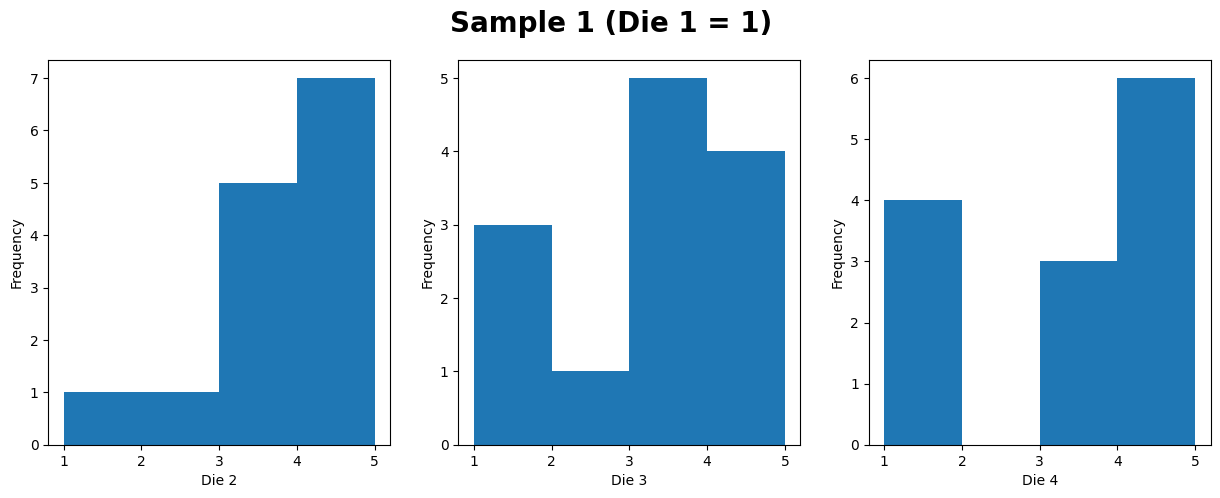

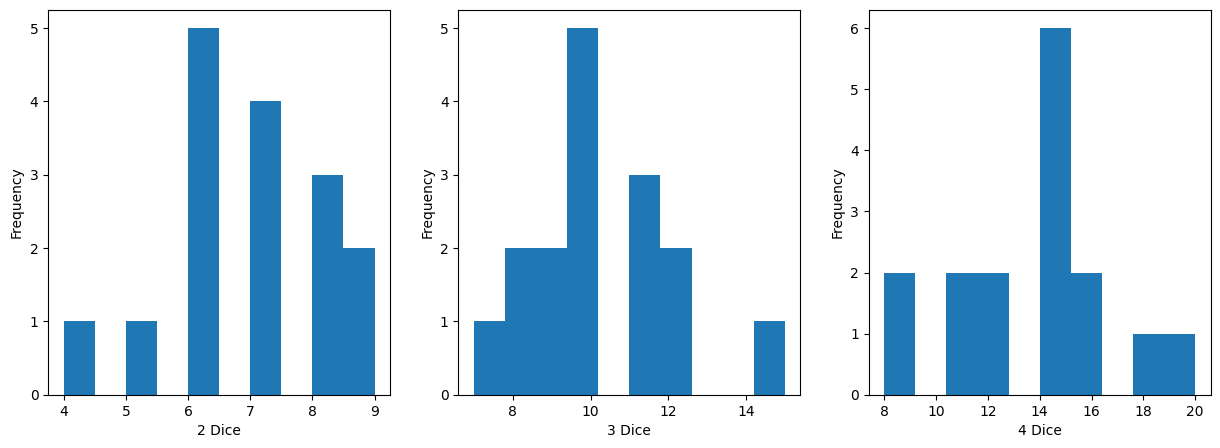

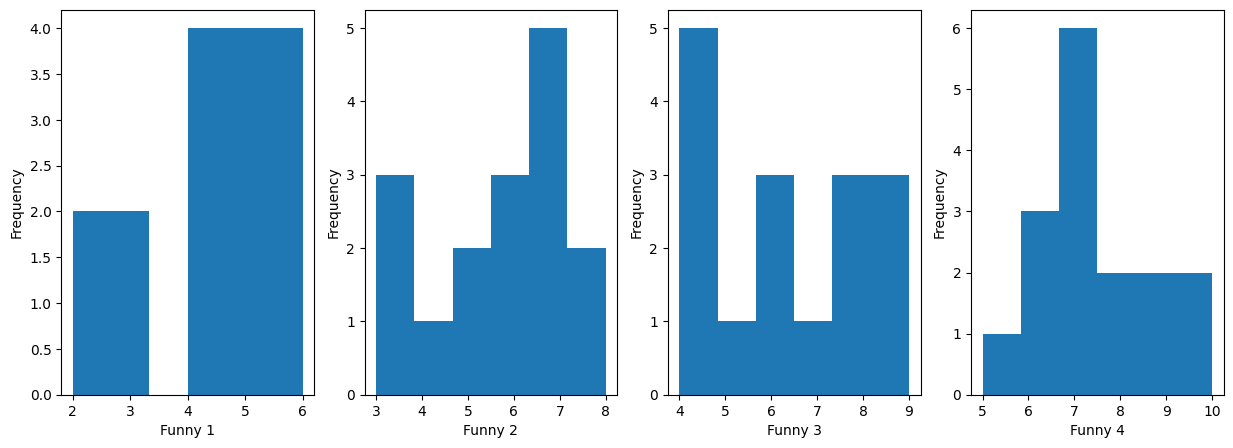

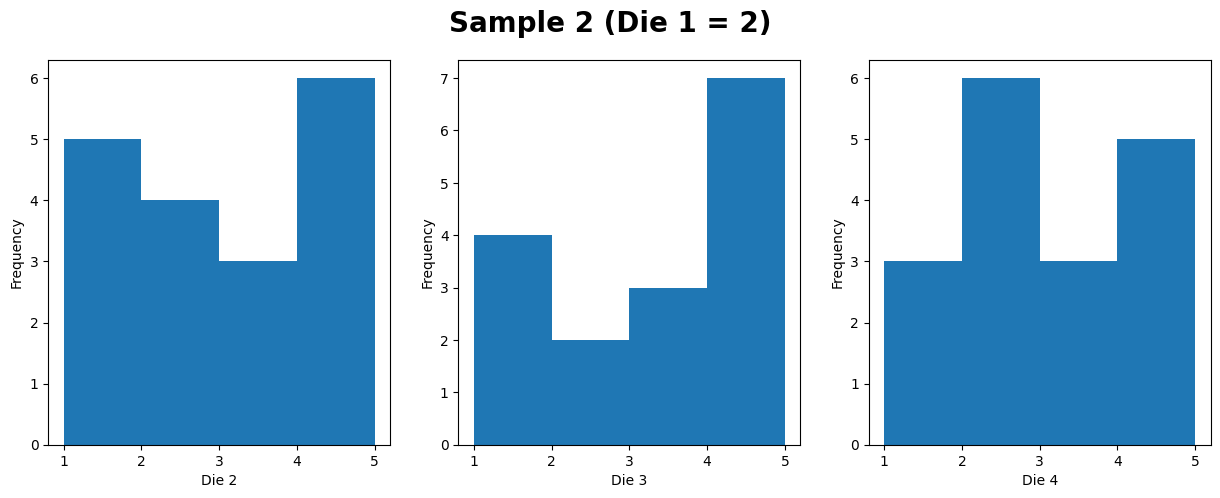

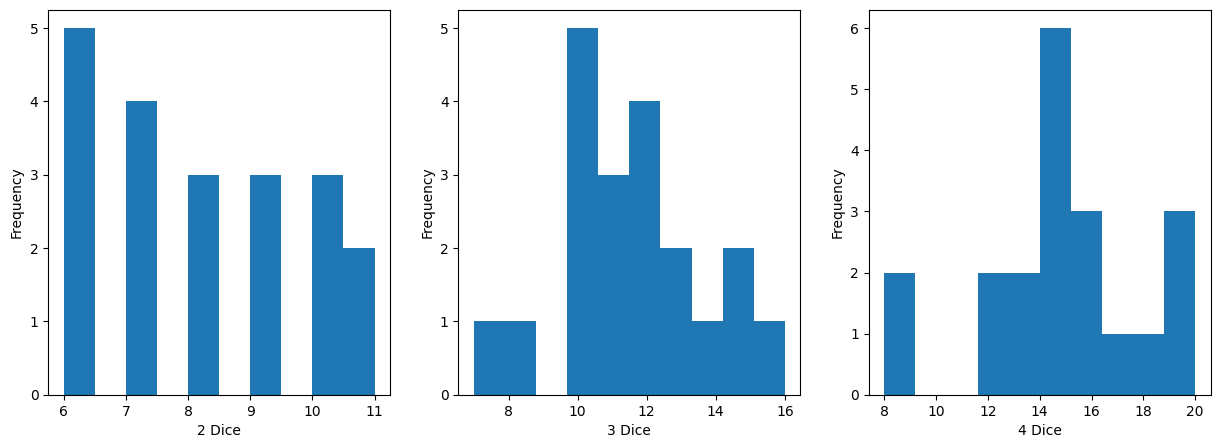

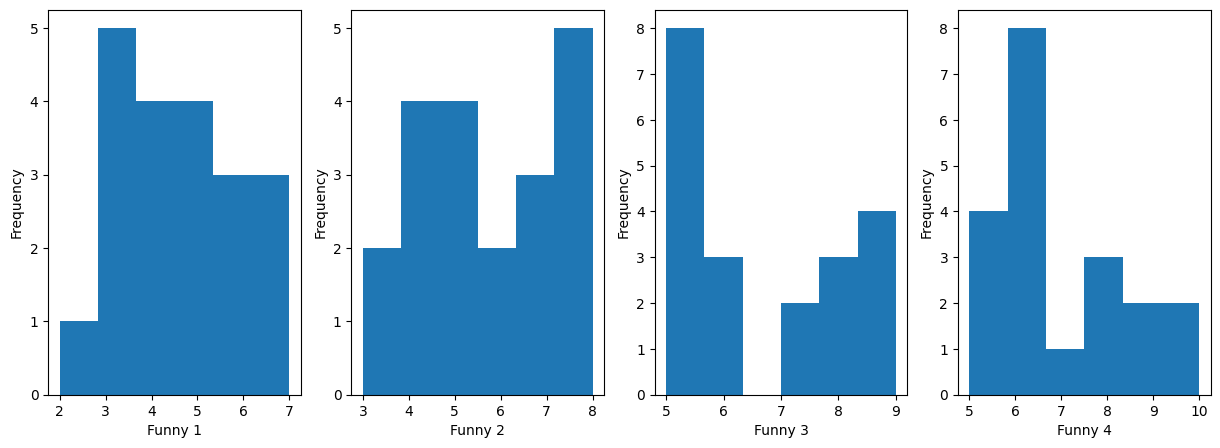

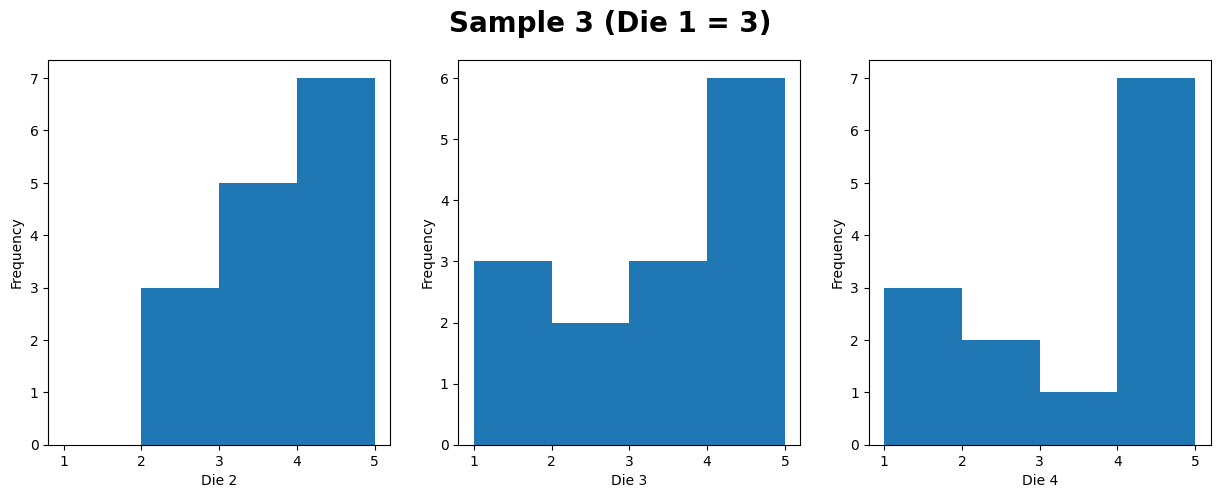

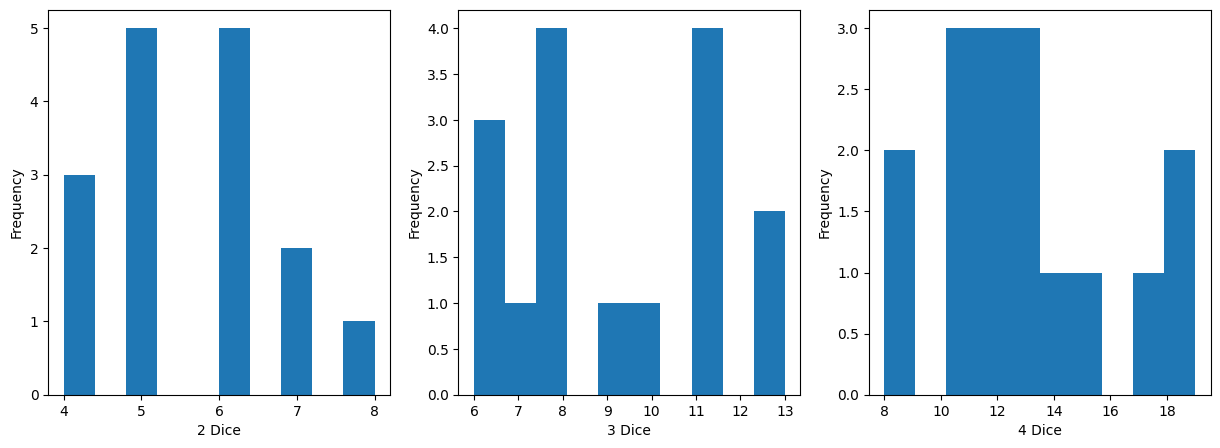

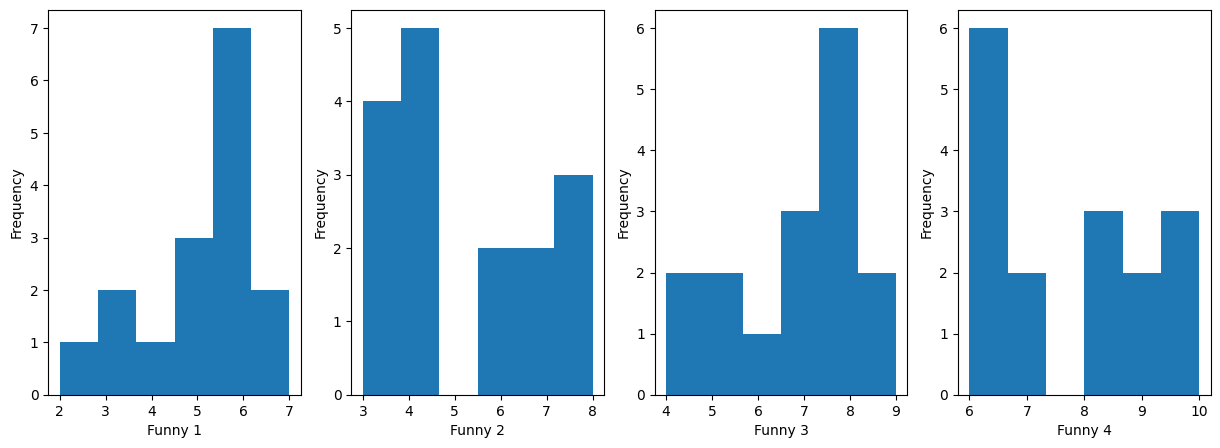

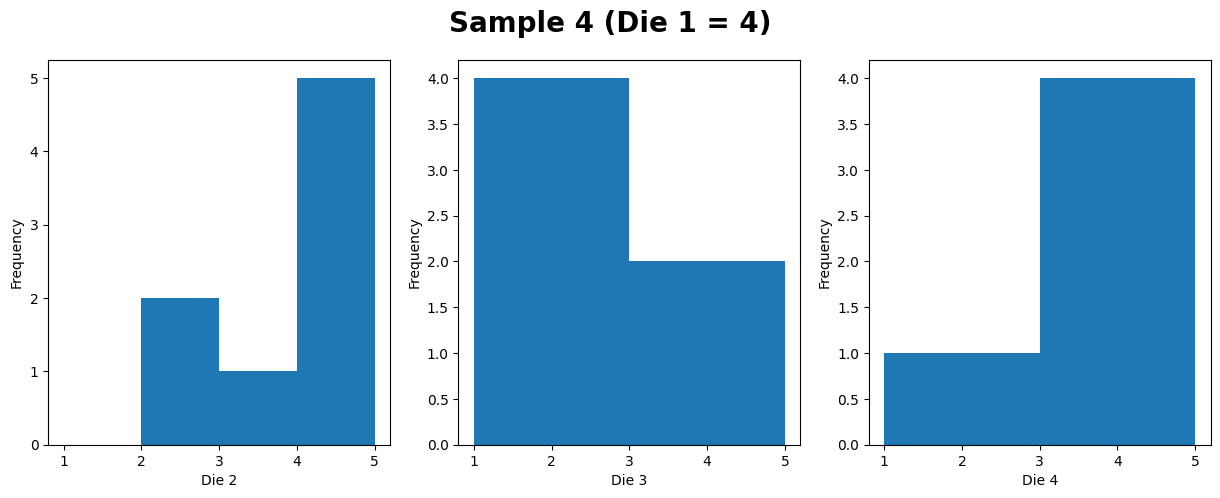

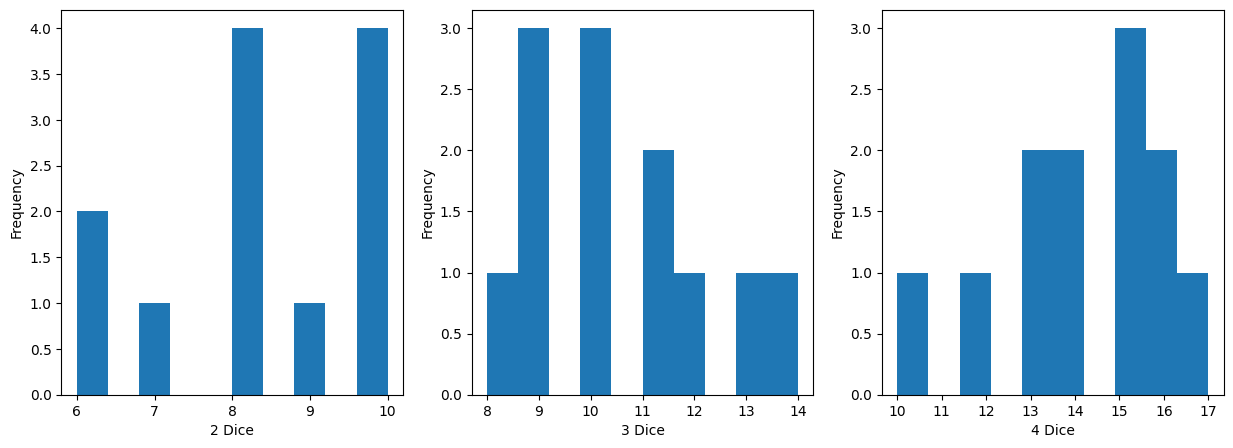

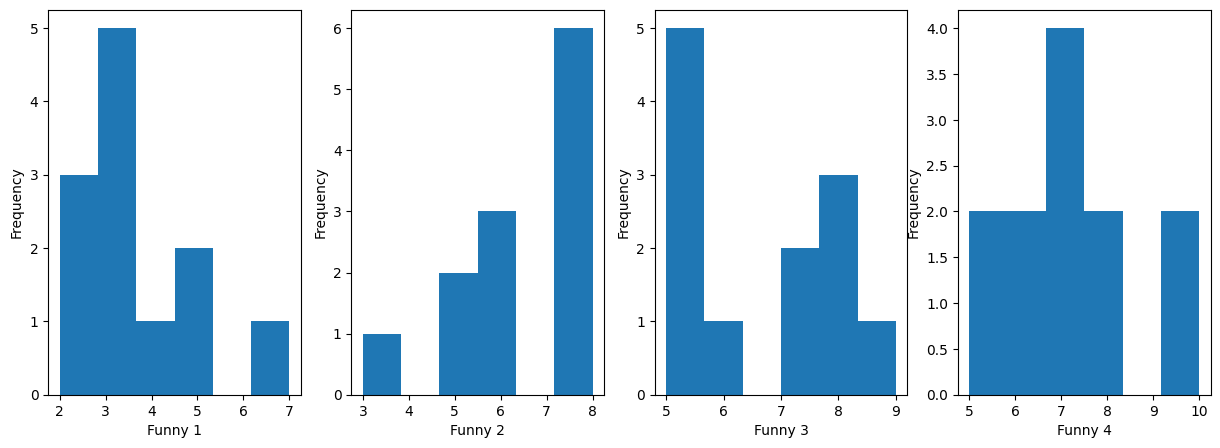

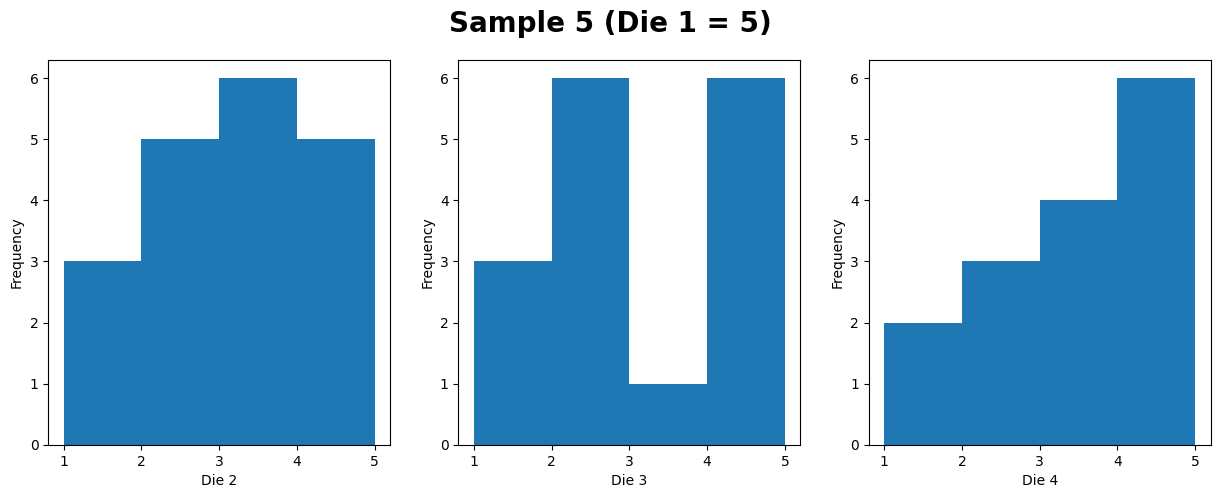

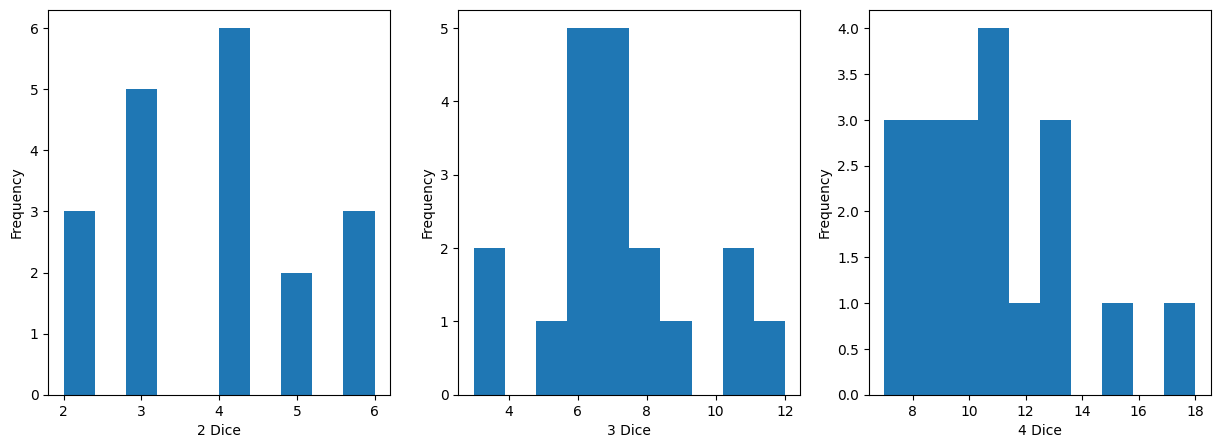

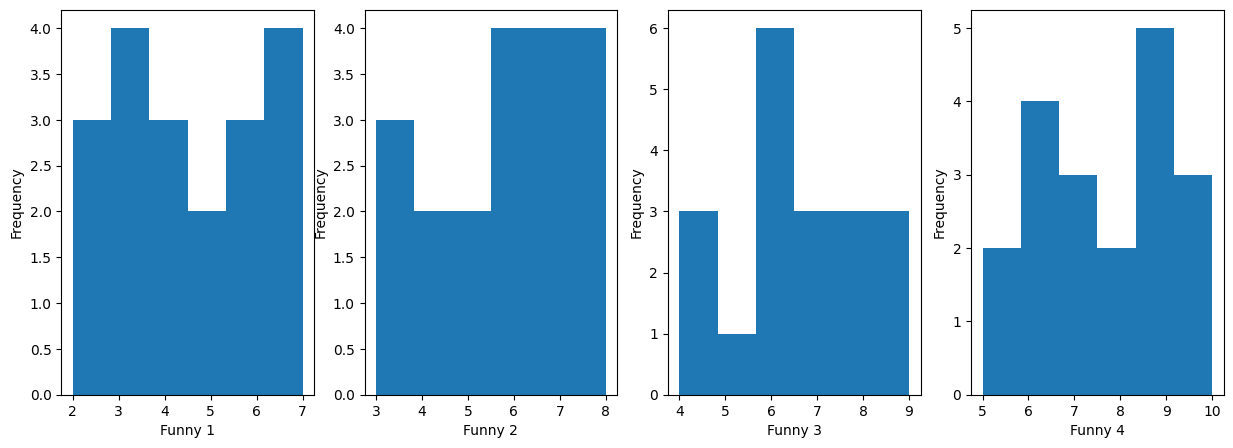

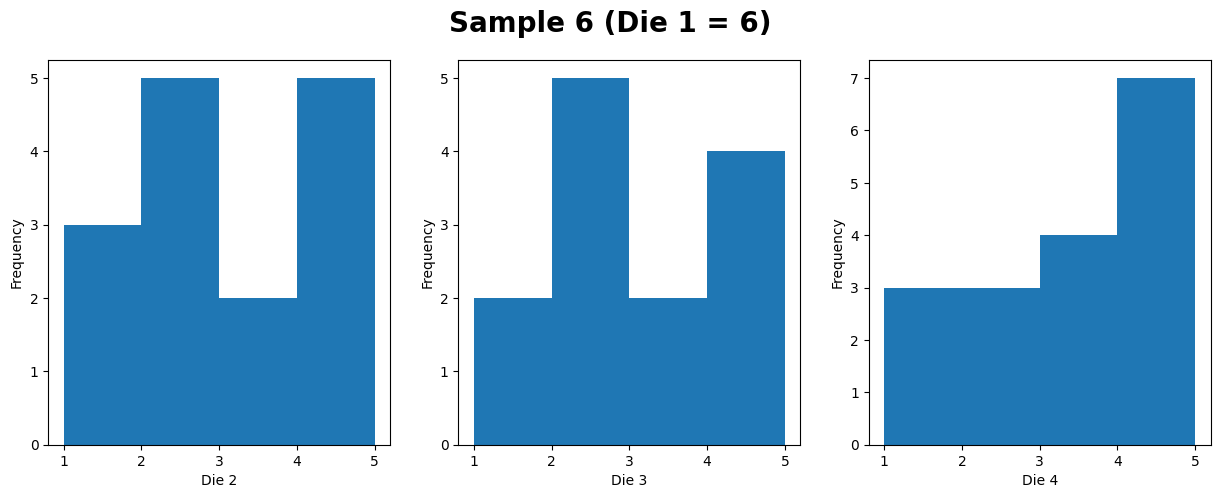

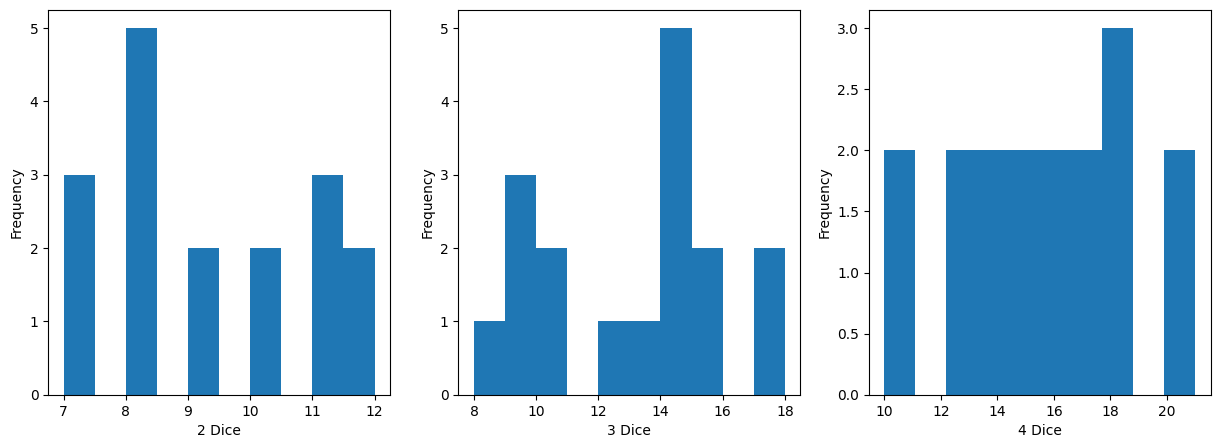

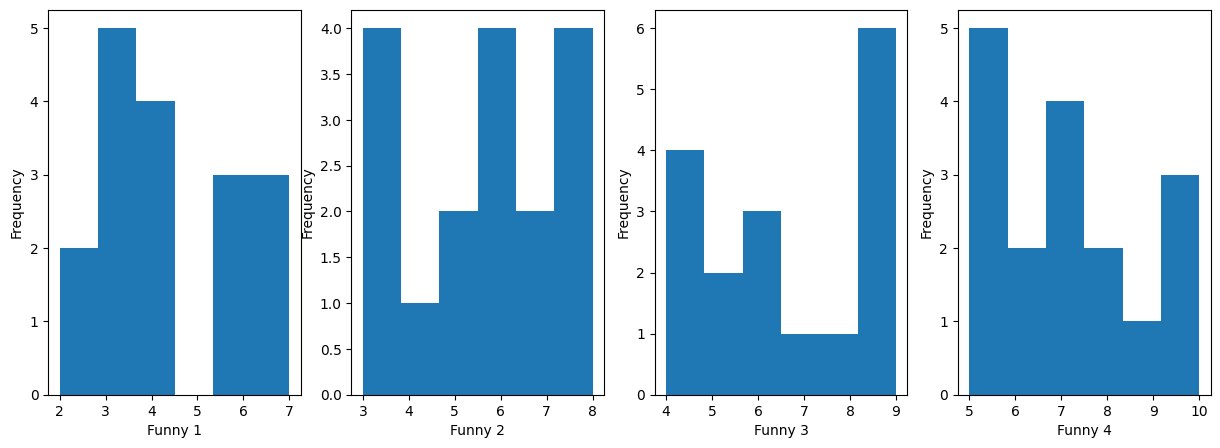

In [55]:
for i,sample in enumerate(samples):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  fig.suptitle(f"Sample {i+1} (Die 1 = {i+1})", size=20, weight='bold')
  for i, col in enumerate(sample.columns[:3]):
      sample[col].plot.hist(ax=axs[i], bins=range(1,6))
      axs[i].set_xlabel(col)

  plt.show()

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  for i, col in enumerate(sample.columns[3:6]):
      sample[col].plot.hist(ax=axs[i])
      axs[i].set_xlabel(col)

  plt.show()

  fig, axs = plt.subplots(1, 4, figsize=(15, 5))
  for i, col in enumerate(sample.columns[6:]):
      sample[col].plot.hist(ax=axs[i], bins=6)
      axs[i].set_xlabel(col)

  plt.show()

Finally, let's plot the boxplots.

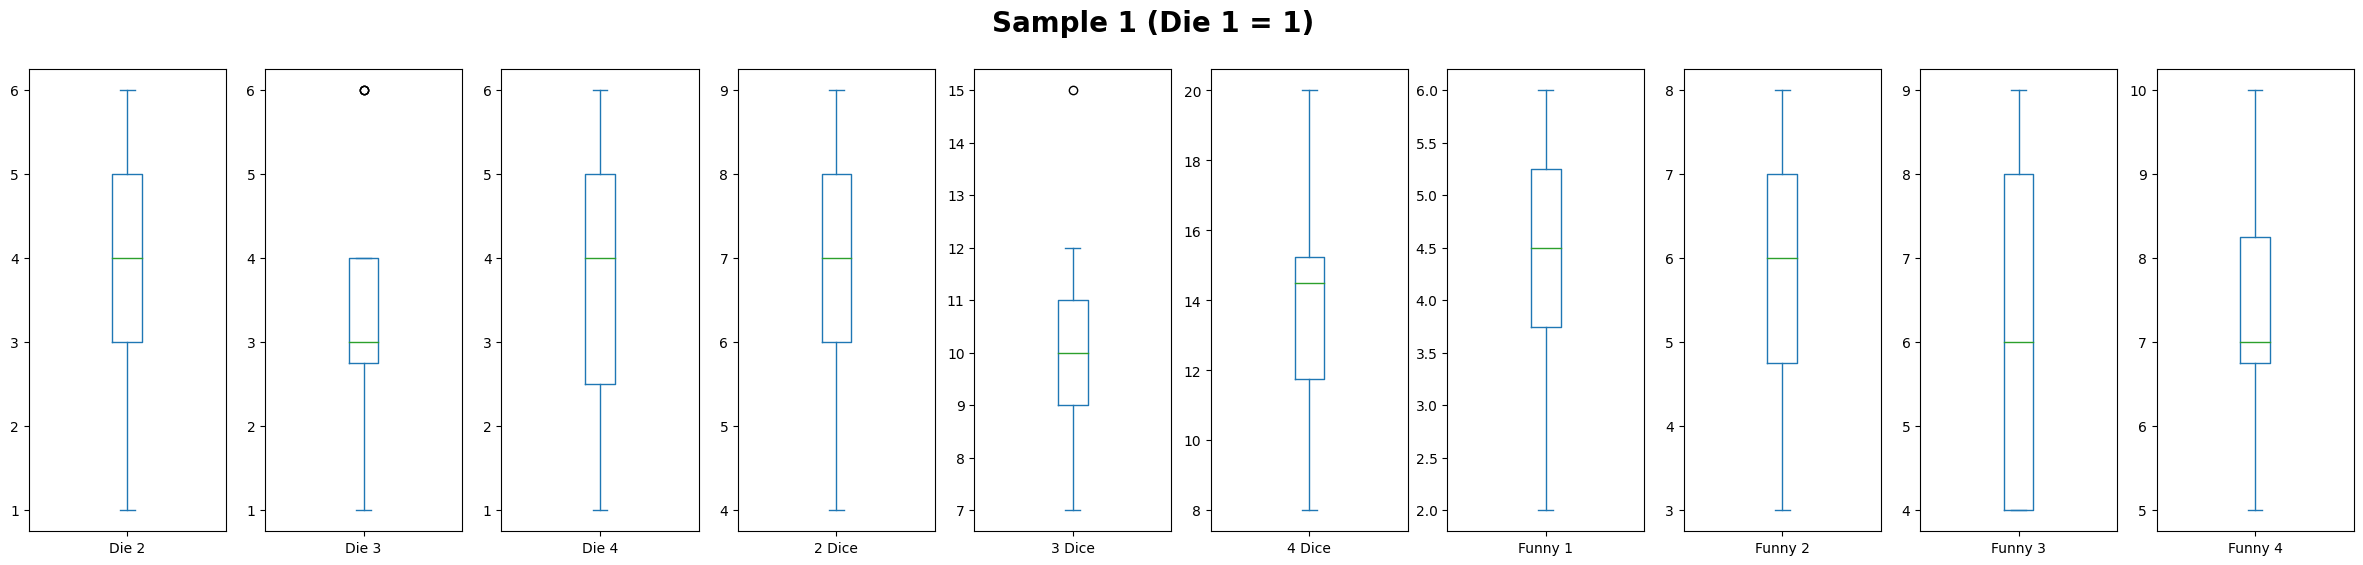

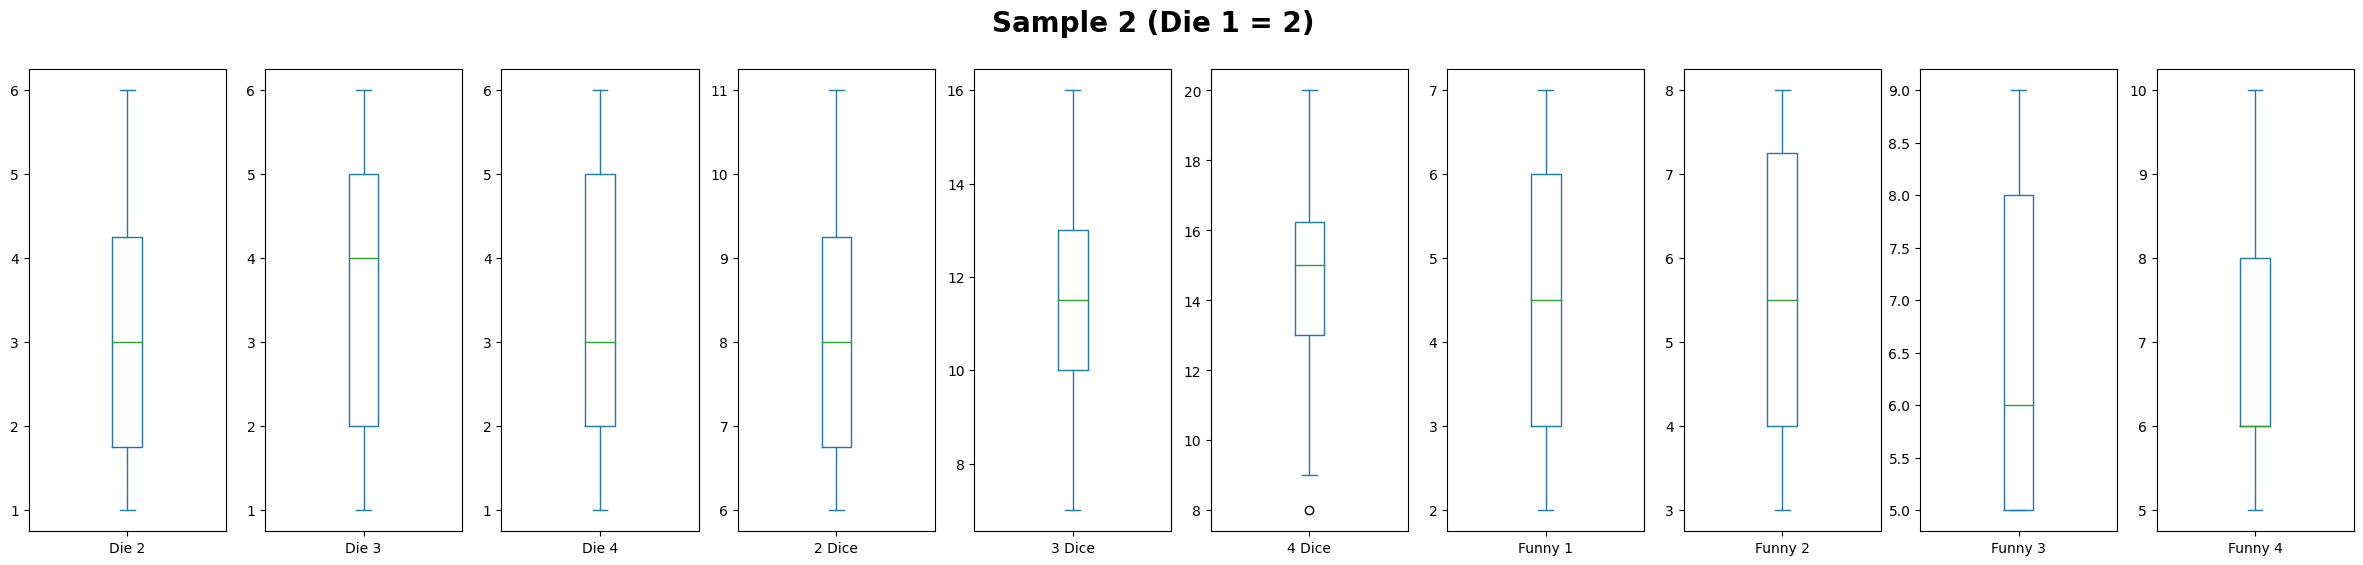

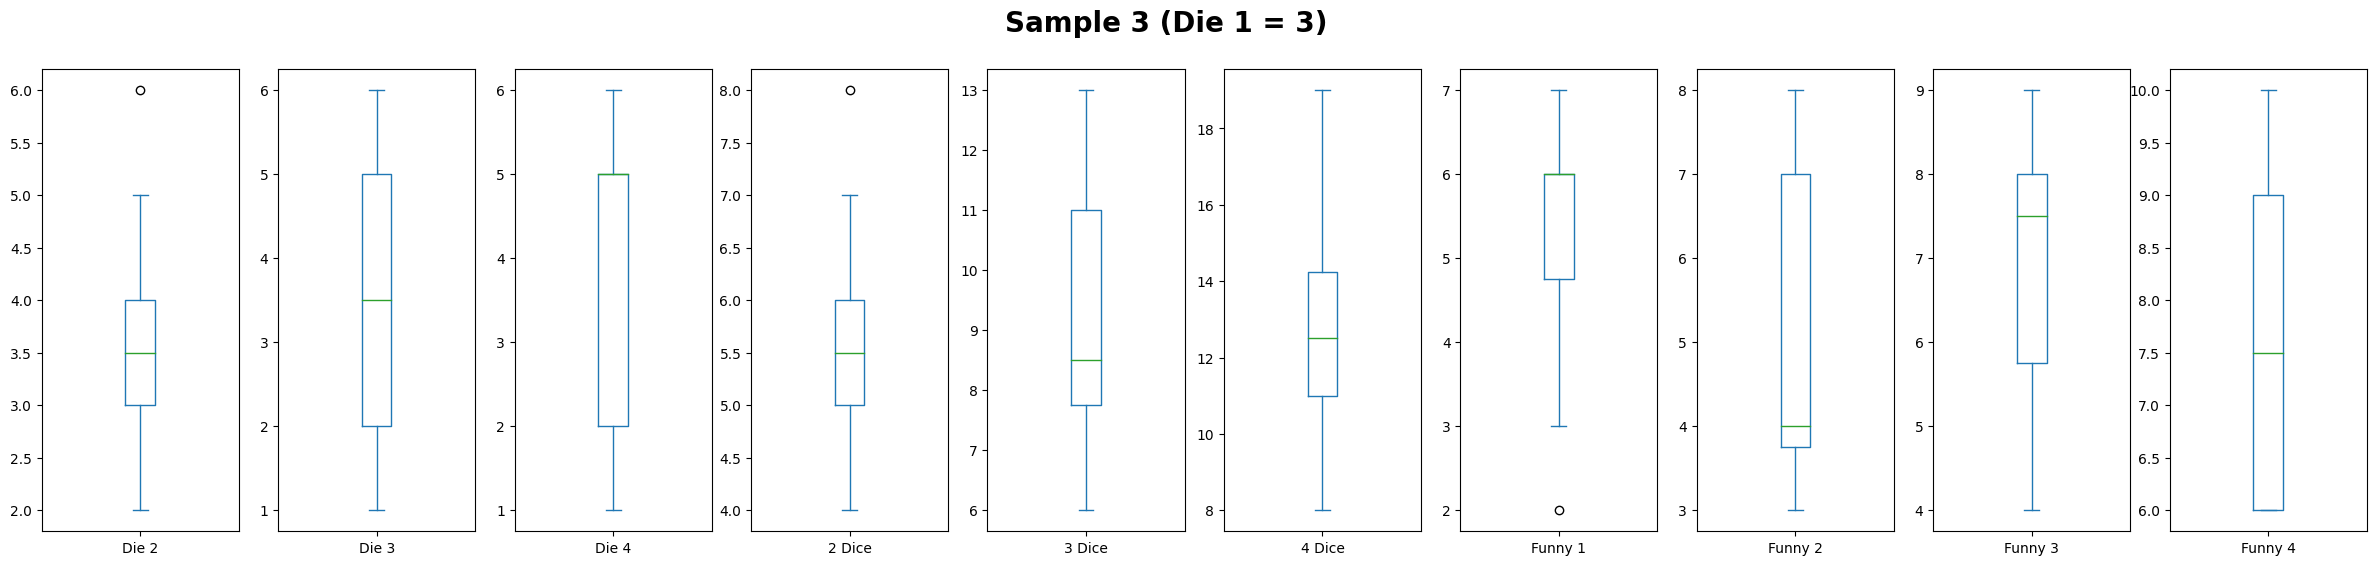

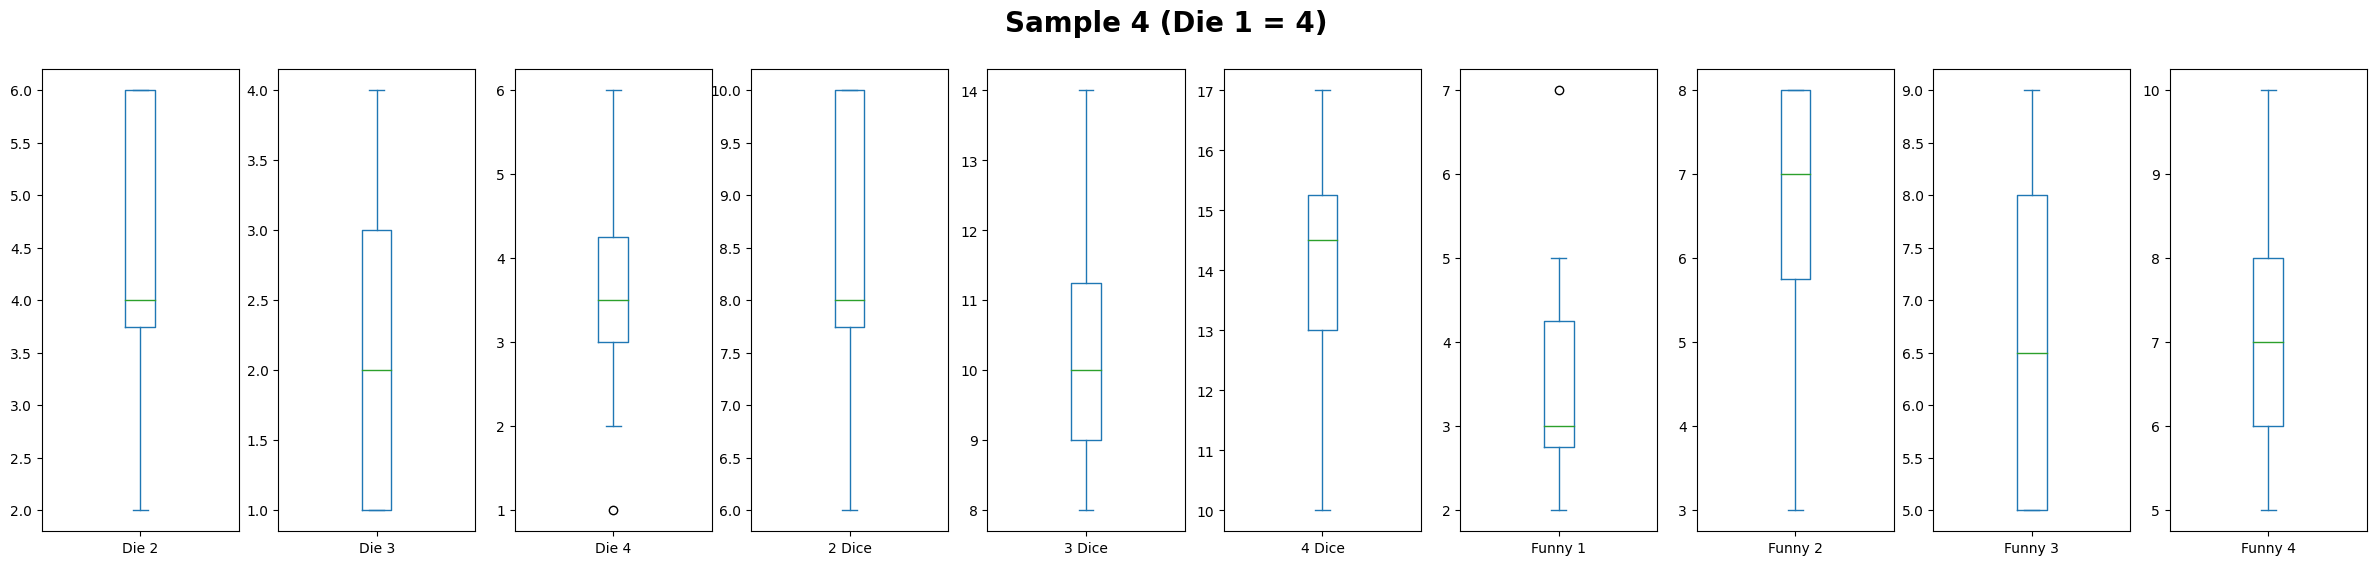

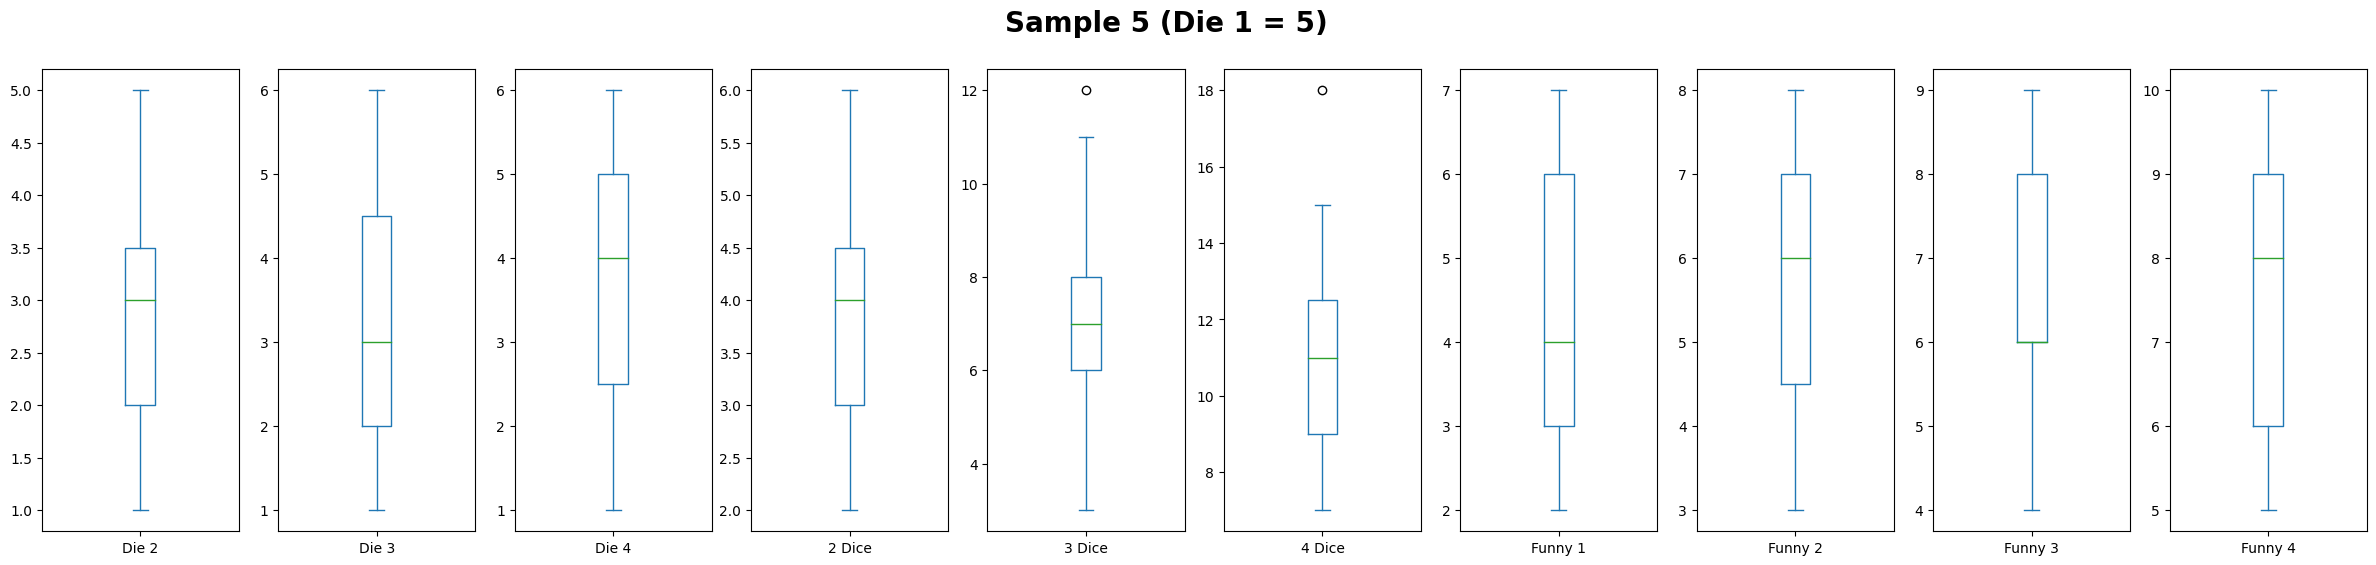

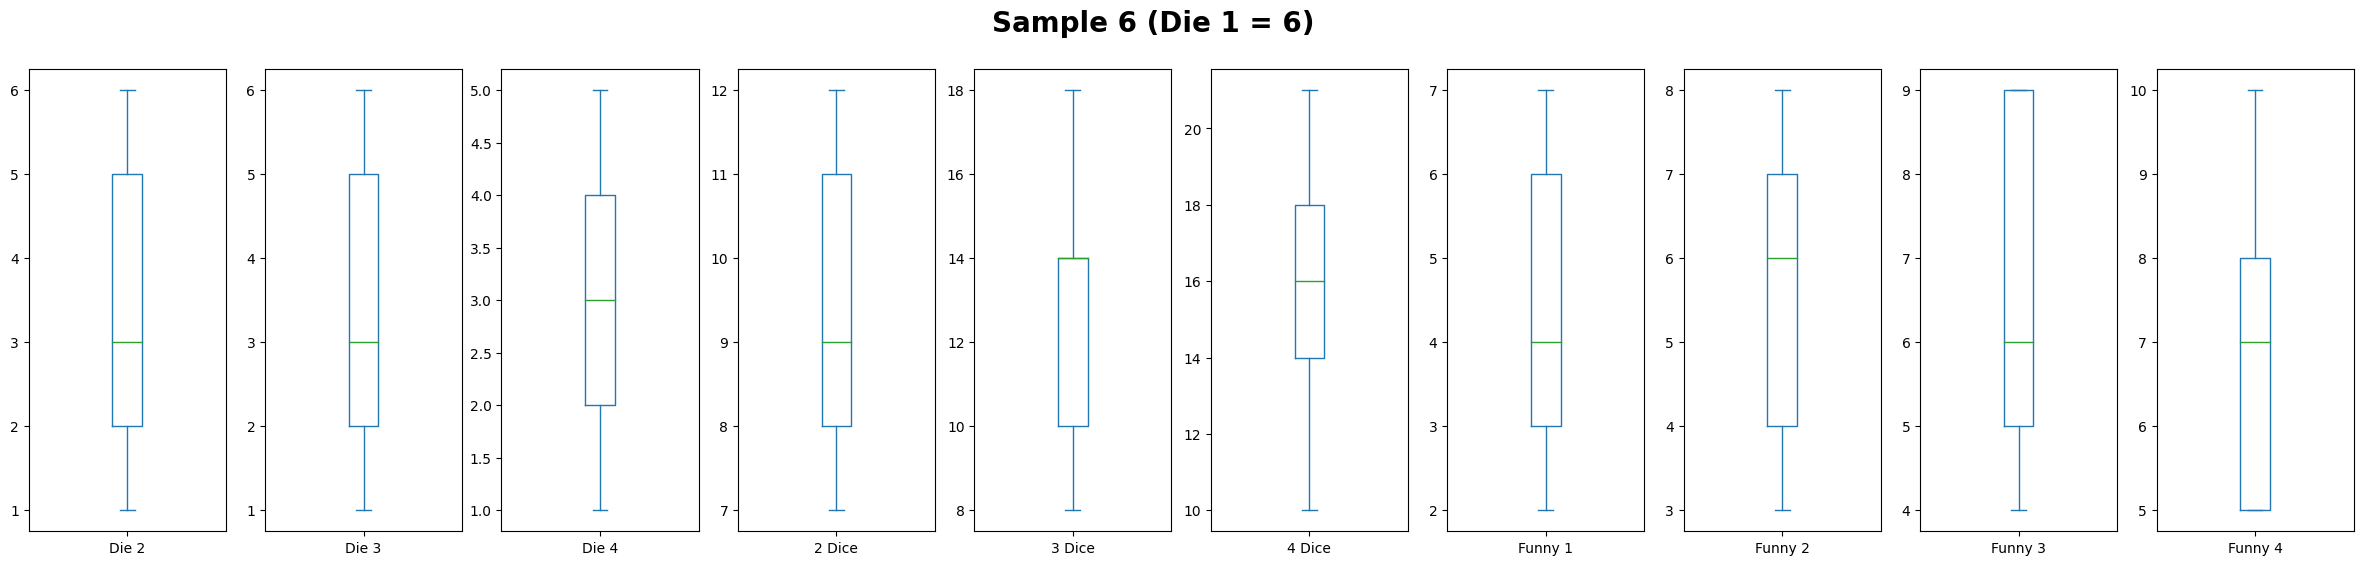

In [56]:
for i, sample in enumerate(samples):
  fig, axs = plt.subplots(1, len(sample.columns), figsize=(30, 6))
  fig.suptitle(f"Sample {i+1} (Die 1 = {i+1})", size=20, weight='bold')
  for i, col in enumerate(sample.columns):
    sample[col].plot.box(ax=axs[i])

  plt.show()